# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [16]:
import pandas as pd
import numpy as np
import json
import random
from citipy import citipy
from Config.api_keys import weather_api_key
import requests
from pprint import pprint
import matplotlib.pyplot as plt
from scipy import stats



## Generate Cities List

In [68]:

cities = []
for x in range(1000):
    ran_lat = random.randint(-90, 90)
    ran_long = random.randint(-180,180)
    city = citipy.nearest_city(ran_lat, ran_long)
    cities.append(city.city_name)

print(len(cities))

1000


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [86]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="


# set up lists to hold reponse info
lat = []
lng = []
temp = []
api_city = []
wind_speed = []
cloudiness = []
humidity = []
country = []
date = []


#Trouble shooting code
# city = 'london'
# response = requests.get(query_url + city).json()
# pprint(response)
# pprint(response['coord']['lat'])


good_count = 0
bad_count = 0
#Loop through the list of cities and perform a request for data on each
for city in cities:
    if good_count < 501:
        try:

            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            temp.append(response['main']['temp_max'])
            api_city.append(city)
            wind_speed.append(response['wind']['speed'])
            cloudiness.append(response['clouds']['all'])
            humidity.append(response['main']['humidity'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            good_count += 1
            print('---------------------------------------------------------------------------')
            print(f'{good_count} Success recieving data from {city}!\n')


        except KeyError:
            bad_count += 1
            print('--------------------------------------------------------------------------')
            print(f'{bad_count} Failed recieving data from {city} due to KeyError! \n')
    else:
        break

---------------------------------------------------------------------------
1 Success recieving data from lahad datu!

---------------------------------------------------------------------------
2 Success recieving data from karachi!

---------------------------------------------------------------------------
3 Success recieving data from ushuaia!

--------------------------------------------------------------------------
1 Failed recieving data from el faiyum due to KeyError! 

---------------------------------------------------------------------------
4 Success recieving data from kultuk!

---------------------------------------------------------------------------
5 Success recieving data from penalva!

---------------------------------------------------------------------------
6 Success recieving data from ushuaia!

---------------------------------------------------------------------------
7 Success recieving data from chokurdakh!

--------------------------------------------------

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [70]:
df = pd.DataFrame({
    'City': api_city,
    'Latitude': lat,
    'Longitude': lng,
    'Max Temp': temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind_Speed': wind_speed,
    'Country': country,
    'Date': date
})

df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Country,Date
0,lahad datu,5.0268,118.3270,24.01,93,100,1.42,MY,1626295631
1,karachi,24.9056,67.0822,28.90,84,75,4.63,PK,1626295516
2,ushuaia,-54.8000,-68.3000,-0.19,80,75,2.06,AR,1626295610
3,kultuk,51.7208,103.6956,13.17,91,2,2.64,RU,1626295632
4,penalva,-3.2942,-45.1736,27.04,57,3,1.14,BR,1626295632


In [71]:
df.to_csv('../Outputs/city_weather.csv')
df.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind_Speed,Date
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,5.010000e+02
mean,9.866993,0.238865,17.721737,75.369261,57.275449,3.709002,1.626296e+09
std,41.498272,102.995340,9.553577,17.312232,38.158668,2.690381,1.258045e+02
min,-54.800000,-175.200000,-0.190000,4.000000,0.000000,0.000000,1.626295e+09
25%,-28.766700,-73.820300,9.060000,68.000000,20.000000,1.790000,1.626295e+09
50%,7.500000,-6.589000,19.820000,80.000000,75.000000,3.510000,1.626296e+09
75%,47.666600,94.733300,25.780000,88.000000,92.000000,4.630000,1.626296e+09
max,78.218600,179.316700,40.150000,100.000000,100.000000,15.560000,1.626296e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

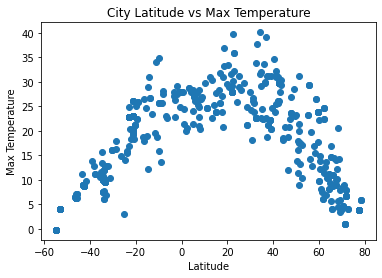

In [72]:
plt.scatter(lat, temp)
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs Max Temperature')
plt.savefig('../Outputs/LatvTemp.png')
plt.show()



## Latitude vs. Humidity Plot

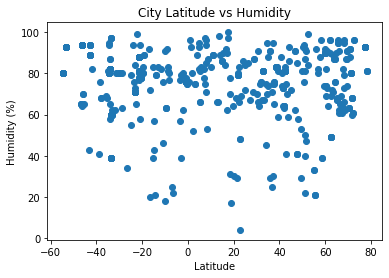

In [73]:
plt.scatter(lat, humidity)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')
plt.savefig('../Outputs/LatvHum.png')

plt.show()

## Latitude vs. Cloudiness Plot

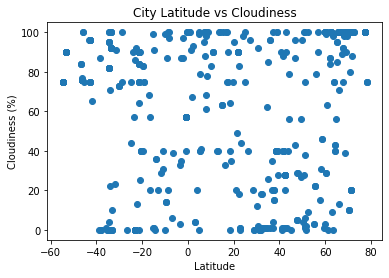

In [74]:
plt.scatter(lat, cloudiness)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness')
plt.savefig('../Outputs/LatvCloud.png')
plt.show()


## Latitude vs. Wind Speed Plot

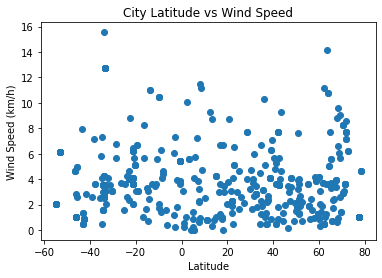

In [75]:
plt.scatter(lat, wind_speed)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (km/h)')
plt.title('City Latitude vs Wind Speed')
plt.savefig('../Outputs/LatvWindS.png')
plt.show()

## Linear Regression

In [76]:
df_N = df.loc[df.Latitude >= 0]
df_S = df.loc[df.Latitude <= 0]



####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

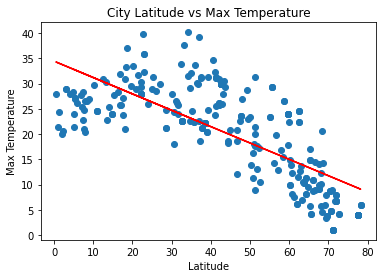

In [77]:
(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_N.Latitude, df_N['Max Temp'])
plt.scatter(df_N.Latitude, df_N['Max Temp'])
plt.plot(df_N.Latitude, (slope*df_N.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs Max Temperature')
plt.savefig('../Outputs/N_LatvTemp.png')

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

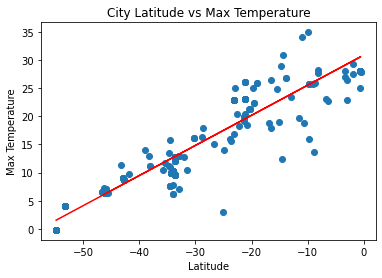

The r value is: 0.9222510712775279


In [78]:
(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_S.Latitude, df_S['Max Temp'])

plt.scatter(df_S.Latitude, df_S['Max Temp'])
plt.plot(df_S.Latitude, (slope*df_S.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title('City Latitude vs Max Temperature')
plt.savefig('../Outputs/S_LatvTemp.png')
plt.show()

print(f"The r value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

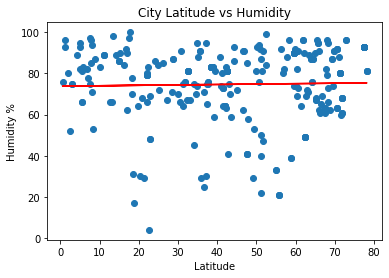

The r value is: 0.02439514830916647


In [79]:

(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_N.Latitude, df_N.Humidity)

plt.scatter(df_N.Latitude, df_N['Humidity'])
plt.plot(df_N.Latitude, (slope*df_N.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs Humidity')
plt.savefig('../Outputs/N_LatvHum.png')
plt.show()

print(f"The r value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

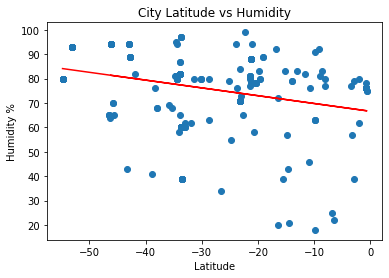

The r value is: -0.29709524856883235


In [80]:
(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_S.Latitude, df_S.Humidity)

plt.scatter(df_S.Latitude, df_S['Humidity'])
plt.plot(df_S.Latitude, (slope*df_S.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.title('City Latitude vs Humidity')
plt.savefig('../Outputs/S_LatvHum.png')
plt.show()

print(f"The r value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

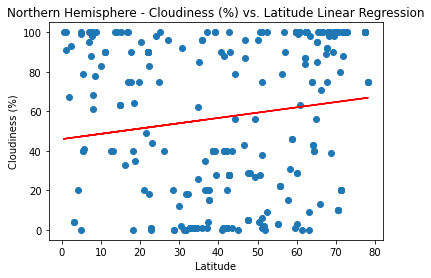

The r value is: 0.1506585382445385


In [81]:
(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_N.Latitude, df_N.Cloudiness)

plt.scatter(df_N.Latitude, df_N.Cloudiness)
plt.plot(df_N.Latitude, (slope*df_N.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
plt.savefig('../Outputs/N_LatvCloud.png')
plt.show()

print(f"The r value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

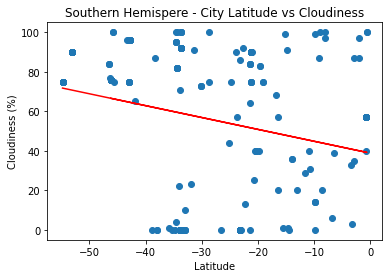

The r value is: -0.24252878584194695


In [82]:
(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_S.Latitude, df_S.Cloudiness)

plt.scatter(df_S.Latitude, df_S.Cloudiness)
plt.plot(df_S.Latitude, (slope*df_S.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemispere - City Latitude vs Cloudiness')
plt.savefig('../Outputs/S_LatvCloud.png')
plt.show()

print(f"The r value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

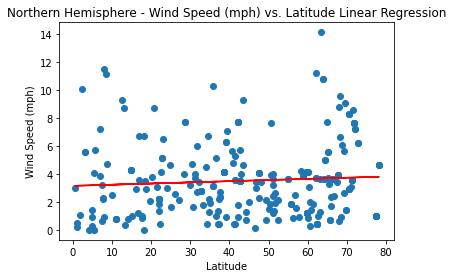

The r value is: 0.06914729211248374


In [83]:
(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_N.Latitude, df_N['Wind_Speed'])

plt.scatter(df_N.Latitude, df_N['Wind_Speed'])
plt.plot(df_N.Latitude, (slope*df_N.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('../Outputs/N_LatvWind.png')
plt.show()

print(f"The r value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

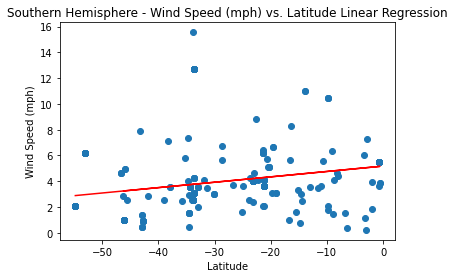

The r value is: 0.2297899175289699


In [84]:
(slope, intercept, rvalue, pvalue , stderr) = stats.linregress(df_S.Latitude, df_S['Wind_Speed'])

plt.scatter(df_S.Latitude, df_S['Wind_Speed'])
plt.plot(df_S.Latitude, (slope*df_S.Latitude+intercept), color='red')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
plt.savefig('../Outputs/S_LatvWind.png')
plt.show()

print(f"The r value is: {rvalue}")